In [31]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Position'
]

In [33]:
FF18 = pd.read_csv('data/Dataset.csv')
premier_league = pd.read_csv('data/premier-league-teams-2019.csv', header=0, index_col=0)

In [34]:
FF18 = pd.DataFrame(FF18, columns=interesting_columns)
FF18.head(1).T

,0
Name,A. Mac Allister
Age,19
Nationality,Argentina
Overall,72
Potential,86
Club,Argentinos Juniors
Value,€6.5M
Wage,€15K
Position,CM|CAM|On Loan


In [35]:
premier_league['League'] = 'English Premier League'
prem_teams = FF18.merge(premier_league, on=["Club"])
prem_teams = prem_teams[prem_teams.Club.isin(premier_league.Club)]
FF18 = prem_teams
FF18.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,League
0,A. Wan-Bissaka,20,England,78,86,Crystal Palace,€13M,€36K,RB,English Premier League
1,W. Zaha,25,Ivory Coast,82,85,Crystal Palace,€28.5M,€78K,CF|LM,English Premier League
2,M. Batshuayi,24,Belgium,80,83,Crystal Palace,€19M,€105K,ST|On Loan,English Premier League


In [36]:
FF18.fillna(value=0, inplace=True)
FF18.dropna(inplace=True)

In [37]:
# Supporting function for converting string values into numbers
import re
def str2number(amount):
    if amount[-1] == 'M':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000000
    elif amount[-1] == 'K':
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)*1000
    else:
        amount = float(re.sub('[^\d\.]', '', amount))
        return float(amount)
    
FF18['ValueNum'] = FF18['Value'].apply(lambda x: str2number(x))
FF18['WageNum'] = FF18['Wage'].apply(lambda x: str2number(x))

In [38]:
FF18.head(1).T

,0
Name,A. Wan-Bissaka
Age,20
Nationality,England
Overall,78
Potential,86
Club,Crystal Palace
Value,€13M
Wage,€36K
Position,RB
League,English Premier League


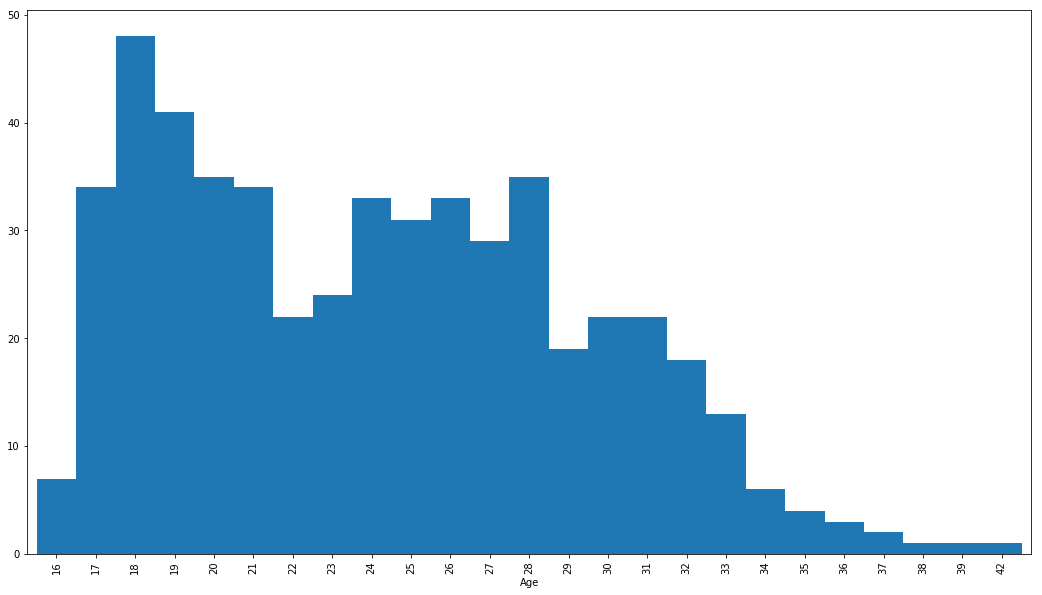

In [39]:
plt.figure(figsize=(18, 10))
FF18.groupby('Age')['Age'].count().plot(kind='bar', width=1)
plt.show()

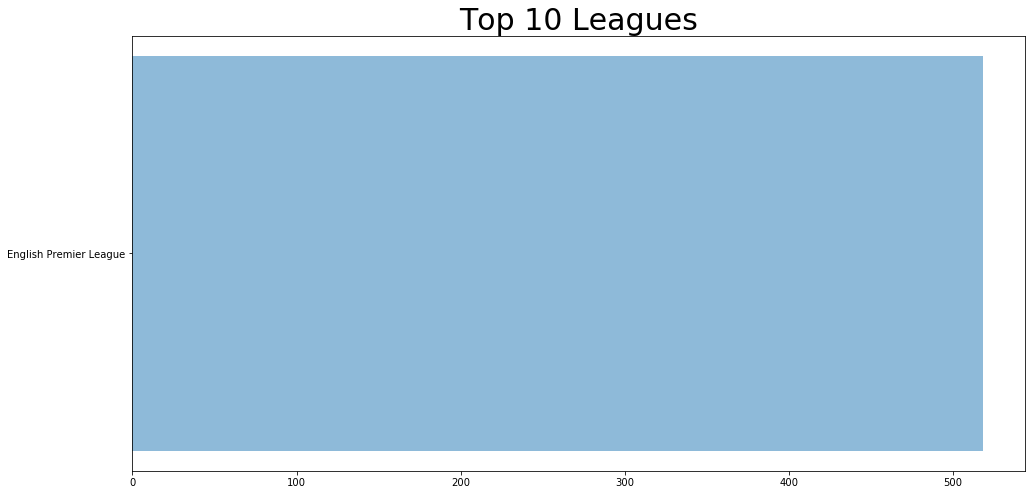

In [40]:
plt.figure(figsize=(16,8))
teams = FF18.groupby('League')['Name'].count().reset_index()
teams = teams.sort_values('Name', ascending=False).head(10)
plt.barh(teams['League'], teams['Name'], align='center', alpha=0.5)
plt.title('Top 10 Leagues', fontsize=30)
plt.show()

In [41]:
def get_best_squad_n(formation, league, measurement = 'Overall'):
    FF18_copy = FF18.copy()
    FF18_copy = FF18_copy[FF18_copy['League'] == league]
    store = []
    for i in formation:
        store.append([
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].max(),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FF18_copy.loc[[FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        FF18_copy.drop(FF18_copy[FF18_copy['Position'].str.contains(i)][measurement].idxmax(), inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [42]:
def get_summary_n(squad_list, squad_name, league_list):
    summary = []
    for i in league_list:
        count = 0
        for j in squad_list:
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, league = i, measurement = 'Overall') 
            summary.append([i, squad_name[count], O_temp_rating.round(2)])    
            count += 1
    return summary

In [43]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']


In [44]:
FF18.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,League,ValueNum,WageNum
0,A. Wan-Bissaka,20,England,78,86,Crystal Palace,€13M,€36K,RB,English Premier League,13000000.0,36000.0
1,W. Zaha,25,Ivory Coast,82,85,Crystal Palace,€28.5M,€78K,CF|LM,English Premier League,28500000.0,78000.0
2,M. Batshuayi,24,Belgium,80,83,Crystal Palace,€19M,€105K,ST|On Loan,English Premier League,19000000.0,105000.0
3,A. Townsend,26,England,78,78,Crystal Palace,€11M,€55K,RM|CF,English Premier League,11000000.0,55000.0
4,L. Milivojević,27,Serbia,80,81,Crystal Palace,€14M,€59K,CDM|CM,English Premier League,14000000.0,59000.0


In [45]:
for league in teams['League']:
    c = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, [league])), columns = ['Nationality', 'Squad', 'Overall']) 
    print(c)
    rating_433_Overall, best_list_433_Overall = get_best_squad_n(squad_433_strict, league, 'Overall')
    print('-Overall-')
    print('Average rating: {:.1f}'.format(rating_433_Overall))
    print(best_list_433_Overall)


              Nationality    Squad Overall
0  English Premier League    3-4-3   87.64
1  English Premier League    4-4-2   87.82
2  English Premier League  4-3-1-2   88.36
3  English Premier League    4-3-3   88.18
4  English Premier League  4-2-3-1   88.09
-Overall-
Average rating: 88.2
Position            Player Overall  Age                Club    Value    Wage
      GK         H. Lloris      88   31   Tottenham Hotspur     €36M   €150K
   RB|CB       Azpilicueta      85   28             Chelsea   €30.5M   €160K
      CB       V. van Dijk      89   26           Liverpool     €67M   €225K
      CB   T. Alderweireld      87   29   Tottenham Hotspur     €39M   €165K
   CB|LB        A. Laporte      86   24     Manchester City   €47.5M   €160K
  CAM|CM      K. De Bruyne      91   27     Manchester City     €93M   €355K
  CAM|CM       David Silva      90   32     Manchester City     €60M   €285K
  CDM|CM          N. Kanté      89   27             Chelsea     €63M   €225K
   RW|LW       R. 